### To provide info for execs, clients and claims department we were asked to gather the latest data on Covid  cases

* They need tot total cases and number of deaths
* Claims need to know the number of cases, new deaths, active cases and serious cases
* Clients need to know the number of total cases and total recoveries

In [1]:
# Import the packages
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [3]:
# Scrape the worldometer Covid live update with Beautiful Soup

# Import the url by creating a variable
url = 'https://www.worldometers.info/coronavirus/'

# Specify the url and request with get
page = requests.get(url)

# Connect to the website
if page.status_code == 200:
    html_doc = page.text
    
# Make contact to the page
print(page) 


<Response [200]>


<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   COVID Live - Coronavirus Statistics - Worldometer
  </title>
  <meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/favicon/apple-icon-60x60.png" rel="app
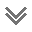

In [4]:
# Tell BeautifulSoup to look at the url
soup = BeautifulSoup(html_doc)

# Print the Soup output
print(soup.prettify())

In [5]:
# Find the table elements
table = soup.find('table', attrs = {'id': 'main_table_countries_today'})
print(table.prettify())

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
 <thead>
  <tr>
   <th width="1%">
    #
   </th>
   <th width="100">
    Country,
    <br/>
    Other
   </th>
   <th width="20">
    Total
    <br/>
    Cases
   </th>
   <th width="30">
    New
    <br/>
    Cases
   </th>
   <th width="30">
    Total
    <br/>
    Deaths
   </th>
   <th width="30">
    New
    <br/>
    Deaths
   </th>
   <th width="30">
    Total
    <br/>
    Recovered
   </th>
   <th width="30">
    New
    <br/>
    Recovered
   </th>
   <th width="30">
    Active
    <br/>
    Cases
   </th>
   <th width="30">
    Serious,
    <br/>
    Critical
   </th>
   <th width="30">
    Tot Cases/
    <br/>
    1M pop
   </th>
   <th width="30">
    Deaths/
    <br/>
    1M pop
   </th>
   <th width="30">
    Total
    <br/>
    Tests
   </th>
   <th width="30">
    Tests/
    <br/>
    <nobr>
     1M pop
    <

In [7]:
# Let's now extract all the rows
rows = table.find_all('tr')

rows

[<tr>
 <th width="1%">#</th>
 <th width="100">Country,<br/>Other</th>
 <th width="20">Total<br/>Cases</th>
 <th width="30">New<br/>Cases</th>
 <th width="30">Total<br/>Deaths</th>
 <th width="30">New<br/>Deaths</th>
 <th width="30">Total<br/>Recovered</th>
 <th width="30">New<br/>Recovered</th>
 <th width="30">Active<br/>Cases</th>
 <th width="30">Serious,<br/>Critical</th>
 <th width="30">Tot Cases/<br/>1M pop</th>
 <th width="30">Deaths/<br/>1M pop</th>
 <th width="30">Total<br/>Tests</th>
 <th width="30">Tests/<br/>
 <nobr>1M pop</nobr>
 </th>
 <th width="30">Population</th>
 <th style="display:none" width="30">Continent</th>
 <th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
 <th width="30">New Cases/1M pop</th>
 <th width="30">New Deaths/1M pop</th>
 <th width="30">Active Cases/1M pop</th>
 </tr>,
 <tr class="total_row_world row_continent" data-continent="North America" style="display: none">
 <td></td>


In [10]:
# Store the output in a pandas DF

output = []

# Create headers 
column_names = ['Index','Country/Other', 'Total Cases', 'New Cases', 'Total Deaths',
                'New Deaths', 'Total Recovered', 'New Recovered', 'Active Cases',
                'Serious, Critical', 'Tot Cases/1m pop', 'Deaths/1m pop', 'Total Tests',
                'Tests/1m pop', 'Population']

# Create for loops that run through all the rows
for covid_country in rows:
    country_data = covid_country.find_all('td')
    if country_data:
        covid_text = [td.text for td in country_data]
        output.append(dict(zip(column_names, covid_text)))
        
output

[{'Index': '',
  'Country/Other': '\nNorth America\n',
  'Total Cases': '105,010,665',
  'New Cases': '+4,632',
  'Total Deaths': '1,485,862',
  'New Deaths': '+21',
  'Total Recovered': '98,612,581',
  'New Recovered': '+16,541',
  'Active Cases': '4,912,222',
  'Serious, Critical': '8,526',
  'Tot Cases/1m pop': '',
  'Deaths/1m pop': '',
  'Total Tests': '',
  'Tests/1m pop': '',
  'Population': ''},
 {'Index': '',
  'Country/Other': '\nAsia\n',
  'Total Cases': '160,965,175',
  'New Cases': '+115,183',
  'Total Deaths': '1,438,787',
  'New Deaths': '+178',
  'Total Recovered': '155,393,532',
  'New Recovered': '+158,147',
  'Active Cases': '4,132,856',
  'Serious, Critical': '10,473',
  'Tot Cases/1m pop': '',
  'Deaths/1m pop': '',
  'Total Tests': '',
  'Tests/1m pop': '',
  'Population': ''},
 {'Index': '',
  'Country/Other': '\nSouth America\n',
  'Total Cases': '59,445,859',
  'New Cases': '+6,534',
  'Total Deaths': '1,304,273',
  'New Deaths': '+14',
  'Total Recovered': '56

In [12]:
# Pass the output into a Pandas DF 
data = pd.DataFrame(output)

data

Index      Country,Other  Total Cases New Cases Total Deaths New Deaths  \
0          \nNorth America\n  105,010,665    +4,632    1,485,862        +21   
1                   \nAsia\n  160,965,175  +115,183    1,438,787       +178   
2          \nSouth America\n   59,445,859    +6,534    1,304,273        +14   
3                 \nEurope\n  202,906,475  +319,145    1,854,181       +357   
4                \nOceania\n    9,701,375   +37,252       13,935        +90   
..    ...                ...          ...       ...          ...        ...   
241                   Total:  202,906,475  +319,145    1,854,181       +357   
242                   Total:    9,701,375   +37,252       13,935        +90   
243                   Total:   12,302,219    +4,633      255,803         +7   
244                   Total:          721                     15              
245                   Total:  550,332,489  +487,379    6,352,856       +667   

    Total Recovered New Recovered Active Cases Serious, Critical  \
0        98,612,581       +16,541    4,912,222             8,526   
1       155,393,532      +158,147    4,132,856            10,473   
2        56,353,023       +15,756    1,788,563            10,362   
3       194,844,803      +227,512    6,207,491             5,987   
4         9,328,293        +6,459      359,147               156   
..              ...           ...          ...               ...   
241     194,844,803      +227,512    6,207,491             5,987   
242       9,328,293        +6,459      359,147               156   
243      11,481,346        +1,420      565,070             1,008   
244             706                          0                 0   
245     526,014,284      +425,835   17,965,349            36,512   

    Tot Cases/ 1M pop Deaths/ 1M pop Total Tests Tests/ 1M pop Population  
0                                                                          
1                                                                          
2                                                                          
3                                                                          
4                                                                          
..                ...            ...         ...           ...        ...  
241                                                                        
242                                                                        
243                                                                        
244                                                                        
245          70,602.5          815.0                                       

[246 rows x 15 columns]

In [16]:
# Select relevant columns

data_final = data[['Country,Other','Total Deaths', 
                   'Total Cases', 'New Cases', 'Active Cases', 
                   'Serious, Critical', 'Total Recovered']]

data_final.head()

Country,Other Total Deaths  Total Cases New Cases Active Cases  \
0  \nNorth America\n    1,485,862  105,010,665    +4,632    4,912,222   
1           \nAsia\n    1,438,787  160,965,175  +115,183    4,132,856   
2  \nSouth America\n    1,304,273   59,445,859    +6,534    1,788,563   
3         \nEurope\n    1,854,181  202,906,475  +319,145    6,207,491   
4        \nOceania\n       13,935    9,701,375   +37,252      359,147   

  Serious, Critical Total Recovered  
0             8,526      98,612,581  
1            10,473     155,393,532  
2            10,362      56,353,023  
3             5,987     194,844,803  
4               156       9,328,293